<a href="https://colab.research.google.com/github/BehzadBashokooh/utech_ml_course_assignments/blob/master/Task2/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
#%matplotlib inline

In [4]:
def init_data (min, max, n , b, m1, m2, m3, m4, scale): #makes the data points
    x = np.random.rand(n, 1) * (max-min) + min
    y = b + m1 * x + m2 * x ** 2 + m3 * x ** 3 + m4 * x ** 4
    y = y + np.random.normal(scale=scale, size=y.shape)

    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    data = np.hstack((x , y))

    return data

def data_split (data, train_portion):
  train_indices = np.random.choice(data.shape[0], size = int(data.shape[0]*train_portion), replace = False)
  train = data[train_indices]
  test = np.delete(data, train_indices, 0)

  return train, test

def prepare_x (x, k): #modifies x based on k
    s = np.zeros((len(x),1))
    if k > 0 and x.shape[1] == 1:
        for i in range(2, k+1):
            s = np.hstack((s, x ** i))

        s = np.delete(s,0, axis = 1)
        return np.hstack((x ,s))
    elif k < 1:
        print('k should be greater than 0')
    elif x.shape[1] > 1:
        print('x is not is the correct shape')
        
def prepare_X_line (x, k): #modifies x_line base on k
    x_line = np.arange(x.min() - 1 , x.max() + 1 , 0.1).reshape(-1,1)
    s = np.zeros((len(x_line),1))
    for i in range(2, k+1):
        s = np.hstack((s, x_line ** i))

    s = np.delete(s,0, axis = 1)
    return np.hstack((x_line ,s))

#Section 0: data initiation & split

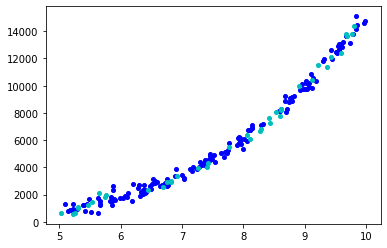

In [5]:
data = init_data (5, 10, 200 , -3.121, 2.358, 1.254, -2.485, 1.769, 300)
train, test = data_split (data, 0.8)
plt.plot(train[:, 0], train[:, 1], 'bo' , ms = 4)
plt.plot(test[:, 0], test[:, 1], 'co' , ms = 4)

#Section 1: 5 data models

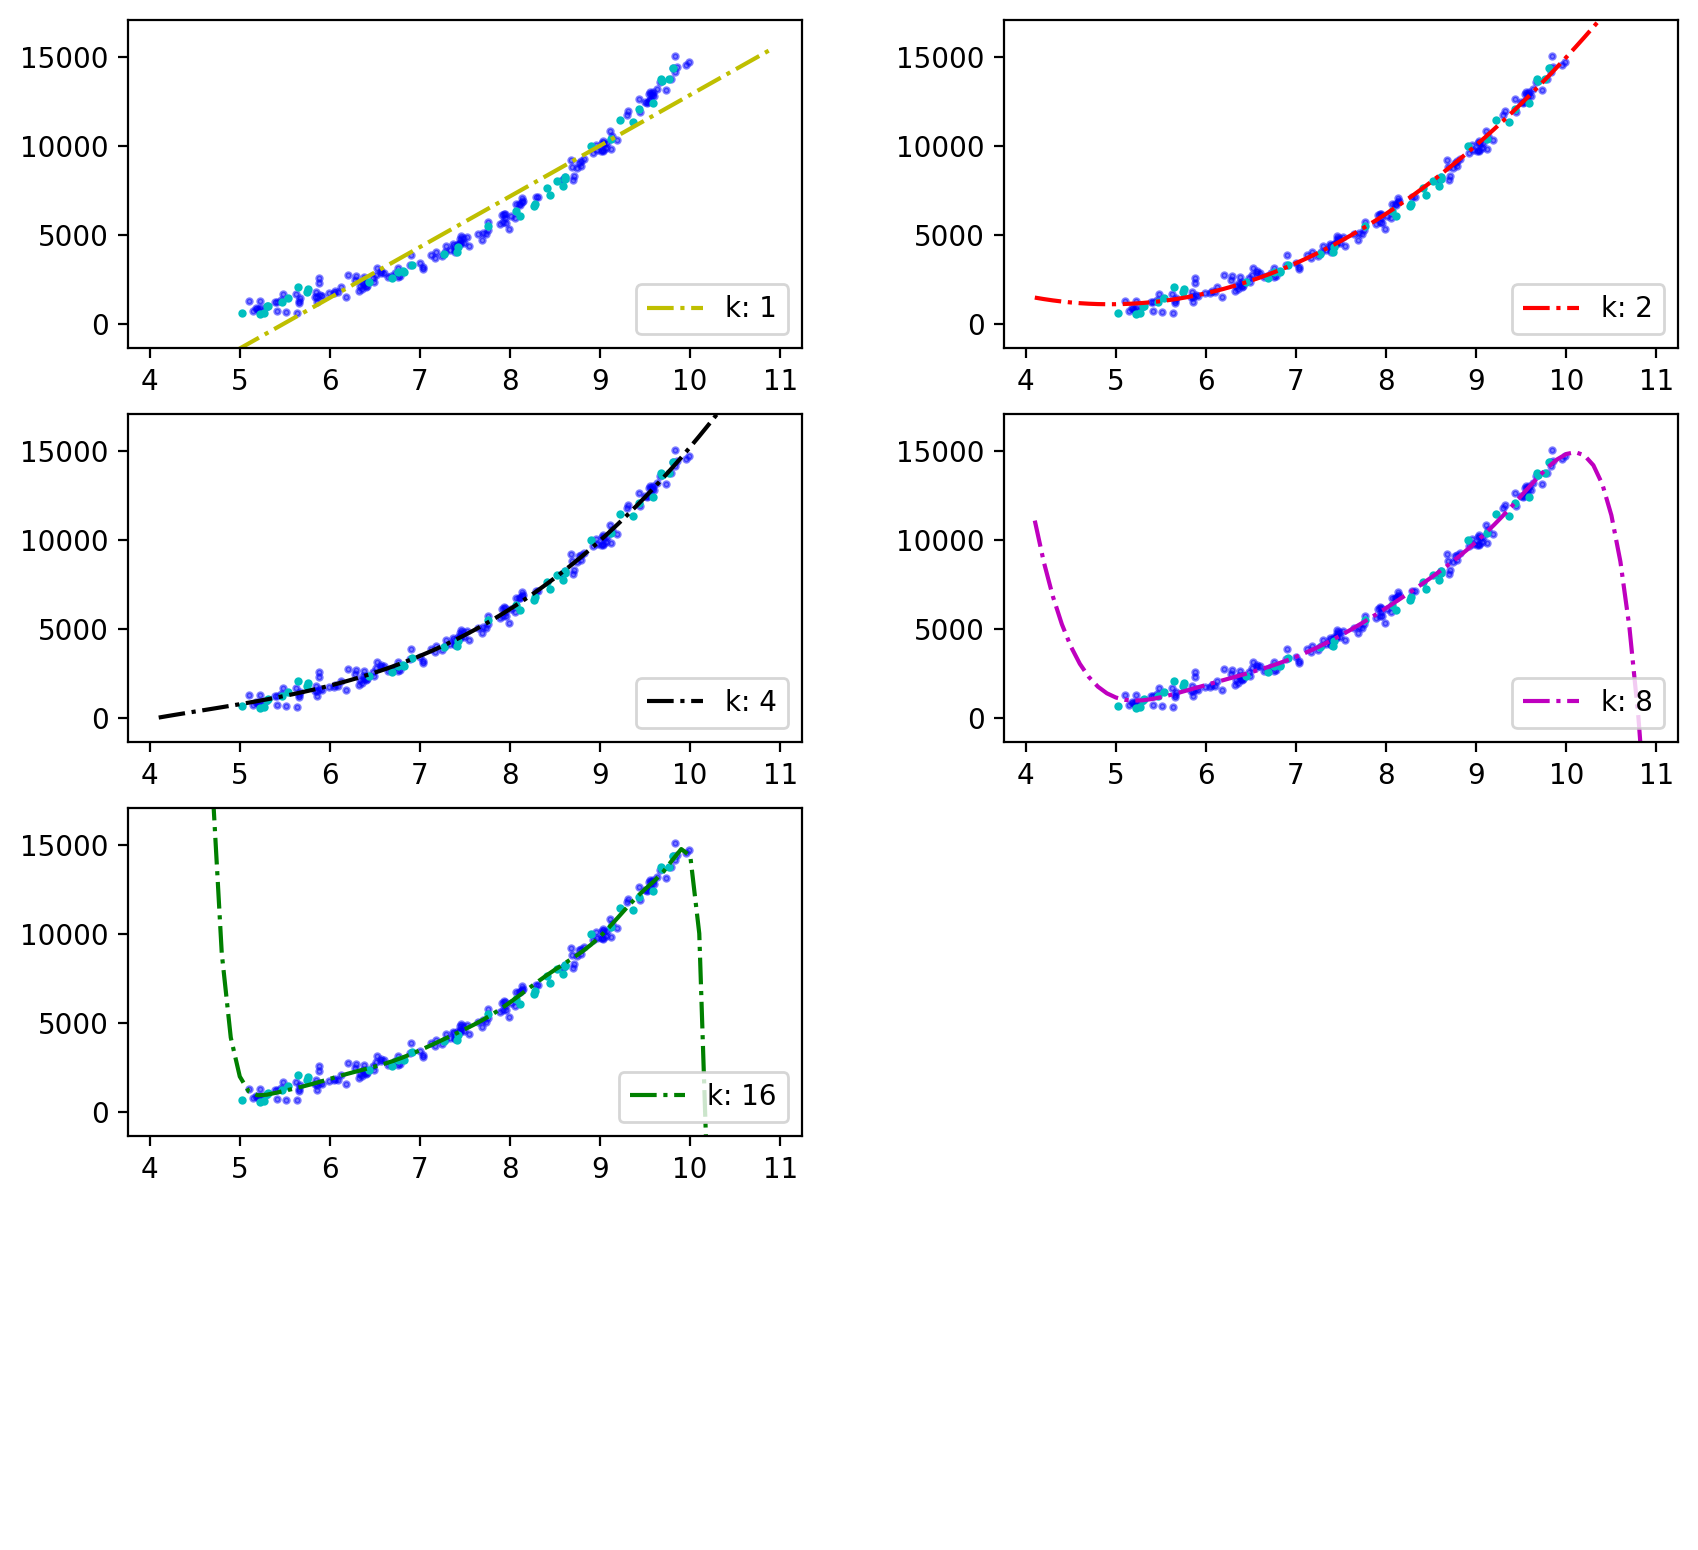

In [24]:
K = [1, 2, 4, 8, 16]

fig, axes = plt.subplots(nrows= 3, ncols = 2, figsize=(10, 10), dpi = 200)
lr_model = LinearRegression(normalize=True)
i=0
line_styles = ['y-.' , 'r-.' , 'k-.' , 'm-.' , 'g-.']
MSE = {'train': [] , 'test': []}
MSE_train = []
for k in K: # fitting the models and plotting them for each k
    x = train[:, 0].reshape(-1,1); y= train[:, 1].reshape(-1,1);
    x_test = test[:, 0].reshape(-1,1); y_test = test[:, 1].reshape(-1,1);
    X = prepare_x(x,k)
    X_test = prepare_x(x_test,k)
    X_line = prepare_X_line (x, k)

    lr_model.fit(X, y)
    y_line = lr_model.predict(X_line)

    MSE['train'].append(mean_squared_error(y, lr_model.predict(X)))
    MSE['test'].append(mean_squared_error(y_test, lr_model.predict(X_test)))

    plt.subplot('42{}'.format(i+1))
    plt.plot(train[:, 0], train[:, 1], 'bo' , ms = 2 , alpha = 0.5)
    plt.plot(test[:, 0], test[:, 1], 'co' , ms = 2 , alpha = 1)
    plt.plot(X_line[:,0], y_line, line_styles[i], label = 'k: {}'.format(k))
    plt.legend(loc = 'lower right')
    i+=1
    plt.ylim(y.min() - 2000, y.max() + 2000) 
plt.subplots_adjust(wspace=0.3)
#print(MSE)
axes[-1, -1].axis('off')
plt.show()



#Section 2: MSE vs k

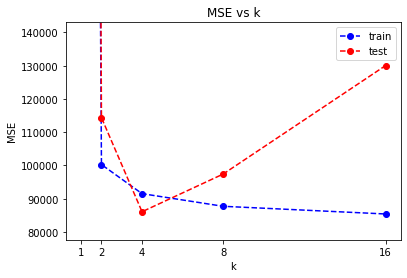

In [25]:
# plot MSE vs k
plt.plot(K, MSE['train'], 'bo--', label = 'train')
plt.plot(K, MSE['test'], 'ro--', label = 'test')
plt.xlabel('k'); plt.ylabel('MSE')
plt.xticks(K, K)
plt.ylim(min(MSE['train'][1:] + MSE['test'][1:])/1.1, max(MSE['train'][1:] + MSE['test'][1:])*1.1)
plt.title(label = 'MSE vs k')
plt.legend(loc = 'upper right')

#Section 3: Loss (MSE) vs train size

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

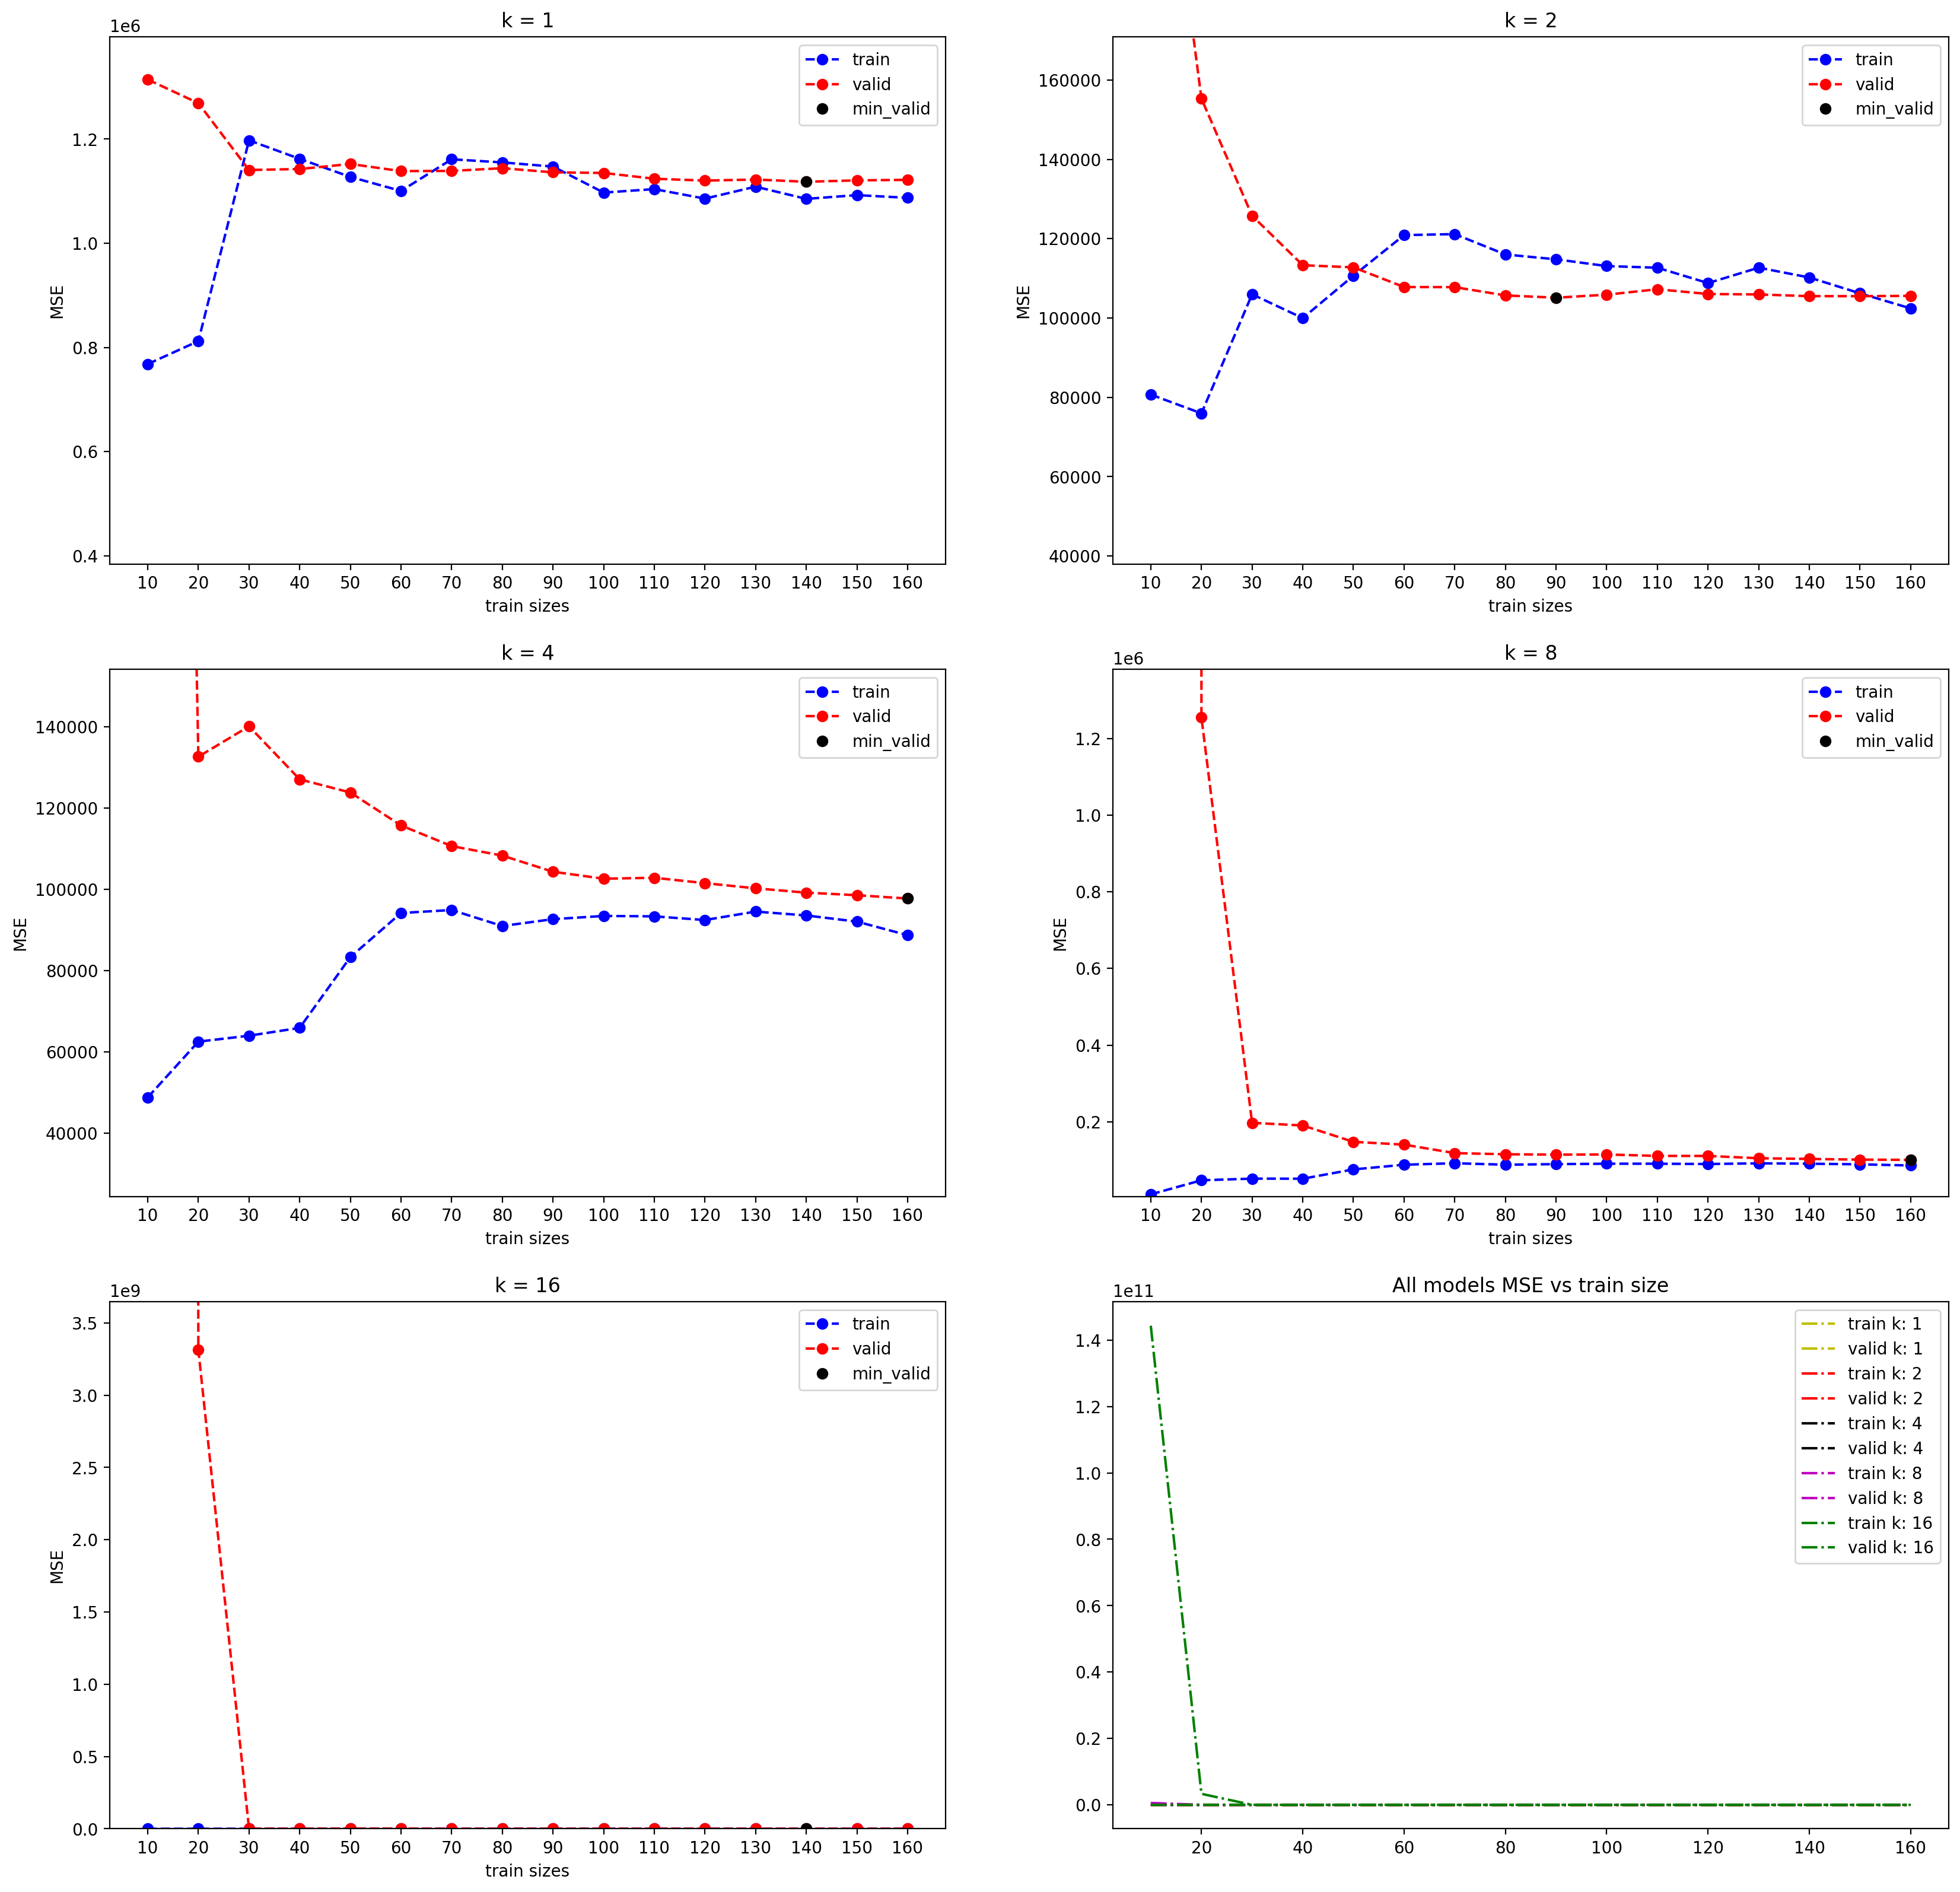

In [45]:
x = data[:, 0 ].reshape(-1,1)
plt.subplots(nrows= 3, ncols = 2, figsize=(20, 20), dpi = 200);

i=0
for k in K:
  X = prepare_x(x,k)
  train_sizes , train_scores , valid_scores = learning_curve(LinearRegression(normalize=True), X, data[:, 1].reshape(-1,1), train_sizes= range(10, int(X.shape[0]*0.8+1), 10), cv=5, scoring = 'neg_mean_squared_error')
  train_scores = train_scores * -1
  valid_scores = valid_scores * -1
  train_scores_mean = np.mean(train_scores, axis = 1)
  
  valid_scores_mean = np.mean(valid_scores, axis = 1)
  plt.subplot('32{}'.format(i+1));
  plt.plot(train_sizes, train_scores_mean, 'bo--', label = 'train');
  plt.plot(train_sizes, valid_scores_mean, 'ro--', label = 'valid');
  plt.ylim(min([*train_scores_mean,*valid_scores_mean])/2, max([*train_scores_mean[1:],*valid_scores_mean[1:]])*1.1)
  max_valid = [train_sizes[np.array(valid_scores_mean).tolist().index(min(valid_scores_mean))], min(valid_scores_mean)]
  plt.plot(max_valid[0], max_valid[1], 'ko', label = 'min_valid');
  plt.xlabel('train sizes'); plt.ylabel('MSE');
  plt.title(label = 'k = {}'.format(k));
  plt.xticks(train_sizes, train_sizes);
  plt.legend(loc = 'upper right');

  plt.subplot('32{}'.format(6));
  plt.plot(train_sizes, train_scores_mean, line_styles[i], label = 'train k: {}'.format(k));
  plt.plot(train_sizes, valid_scores_mean, line_styles[i], label = 'valid k: {}'.format(k));
  plt.title(label = 'All models MSE vs train size')
  
  i+=1

plt.legend(loc = 'best');
#print(valid_scores_mean)

#Section 4: Answer to Questions
1) همانطور که از نمودار سکشن 2 مشخص است، مقدار خطا در مدل با توان چندجمله ای 1 بسیار زیاد است که نشان دهنده آندرفیت بودن مدل است. با افزایش توان چند جمله ای از یک به چهار مقدارخطای مدل ها هم در زمان آموزش و هم در زمان تست کاهش یافته است. این نشان می هد که آندرفیتینگ کاهش یافته است. ولی با افزایش توان چند جمله ای از 4 به 16 با اینکه خطا در آموزش کم شده ولی در تست افزایش یافته است که نشان دهنده اورفیتینگ است.

2) در نمودارهای بخش 3 همانطور که دیده می شود آموزش مدل ها با تعداد دادگان کمتر از 20-30 خطای بسیار زیادی ایجاد می کند. با افزایش تعداد دادگان آموزش، خطا کاهش یافته و به سمت مقدار مشخصی میل می کند. هر چه تعداد داده ها برای آموزش بیشتر می شود اثر افزایش تعداد داده ها بر کاهش خطای تست کمتر می شود. مشخصا در مدلهای با تعداد جندجمله ای یک و دو، افزایش تعداد داده ها حتی باعث افزایش خطای تست شده است.

# Section 5
In the following chart why the score of learning curve is negative for k=8 & k=16?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

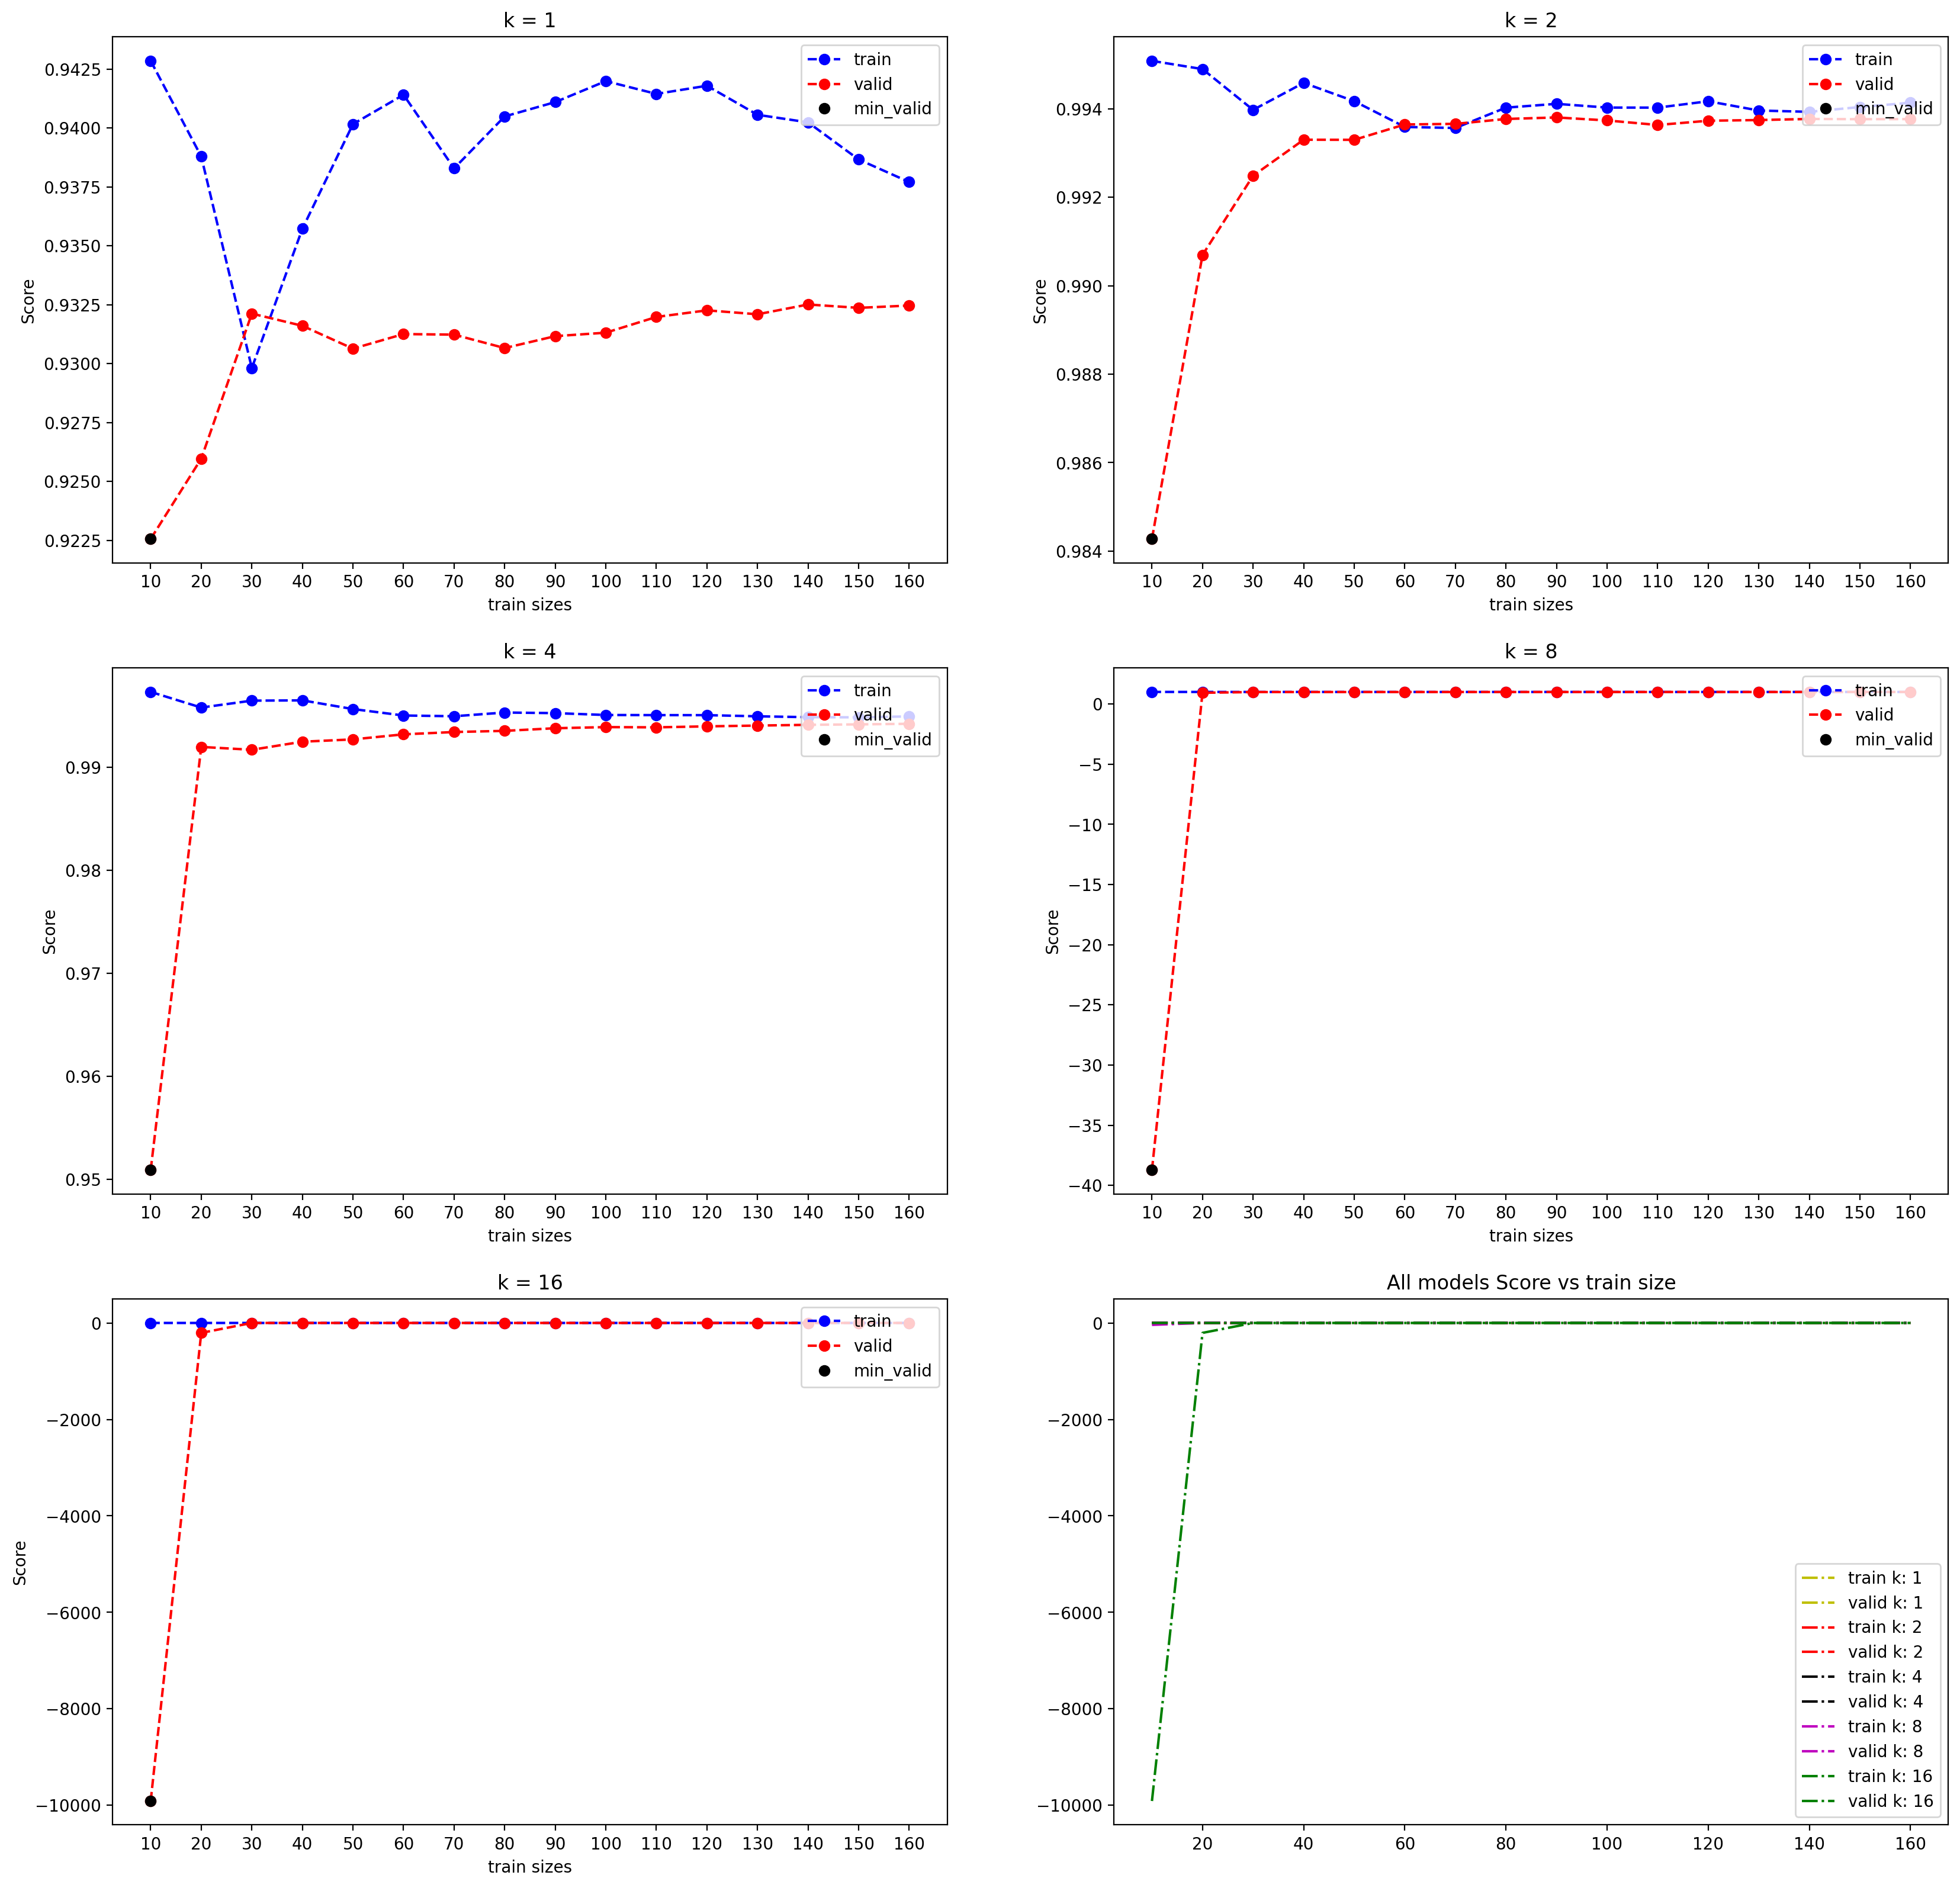

In [48]:
x = data[:, 0 ].reshape(-1,1)
plt.subplots(nrows= 3, ncols = 2, figsize=(20, 20), dpi = 200);

i=0
for k in K:
  X = prepare_x(x,k)
  train_sizes , train_scores , valid_scores = learning_curve(LinearRegression(normalize=True), X, data[:, 1].reshape(-1,1), train_sizes= range(10, int(X.shape[0]*0.8+1), 10), cv=5)
  train_scores_mean = np.mean(train_scores, axis = 1)
  valid_scores_mean = np.mean(valid_scores, axis = 1)
  plt.subplot('32{}'.format(i+1));
  plt.plot(train_sizes, train_scores_mean, 'bo--', label = 'train');
  plt.plot(train_sizes, valid_scores_mean, 'ro--', label = 'valid');
  max_valid = [train_sizes[np.array(valid_scores_mean).tolist().index(min(valid_scores_mean))], min(valid_scores_mean)]
  plt.plot(max_valid[0], max_valid[1], 'ko', label = 'min_valid');
  plt.xlabel('train sizes'); plt.ylabel('Score');
  plt.title(label = 'k = {}'.format(k));
  plt.xticks(train_sizes, train_sizes);
  plt.legend(loc = 'upper right');

  plt.subplot('32{}'.format(6));
  plt.plot(train_sizes, train_scores_mean, line_styles[i], label = 'train k: {}'.format(k));
  plt.plot(train_sizes, valid_scores_mean, line_styles[i], label = 'valid k: {}'.format(k));
  plt.title(label = 'All models Score vs train size')
  
  i+=1

plt.legend(loc = 'best');
#print(valid_scores_mean)